# 20220917 | Classification Using SkLearn

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
# df_train = pd.read_csv('../train_MachineLearningCVE.csv')
df_test = pd.read_csv('../test_MachineLearningCVE.csv')

# df = pd.concat([df_train, df_test], axis=0, copy=True)
df = df_test

def preprocessing(df):
    # Shuffle the dataset
    df = df.sample(frac=1)

    # Split features and labels
    x = df.iloc[:, df.columns != 'Label']
    y = df[['Label']].to_numpy()

    # Scale the features between 0 ~ 1
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)

    return x, y

x, y = preprocessing(df)

X_train,X_test,Y_train,Y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [3]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(396304, 78)
(396304, 1)
(169845, 78)
(169845, 1)


## Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    C=100.0,
    random_state=1,
    solver='lbfgs',
    multi_class='ovr'
)
lr.fit(X_train, Y_train.flatten())

/home/sam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [5]:
predictions = lr.predict(X_test)

In [6]:
accuracy = predictions[predictions == Y_test.flatten()].shape[0] / Y_test.shape[0]
accuracy

0.9613942123701021

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tr.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [10]:
predictions = tr.predict(X_test)
accuracy = predictions[predictions == Y_test.flatten()].shape[0] / Y_test.shape[0]
accuracy

0.9428361152815803

[Text(0.5288461538461539, 0.9, 'X[13] <= 0.223\ngini = 0.343\nsamples = 396304\nvalue = [318193, 267, 18011, 1470, 32312, 753, 813, 1107, 1\n5, 22283, 806, 186, 3, 94]'),
 Text(0.3076923076923077, 0.7, 'X[52] <= 0.002\ngini = 0.224\nsamples = 362009\nvalue = [317784, 267, 6686, 484, 10750, 752, 813, 1107, 0, 5\n22272, 806, 186, 3, 94]'),
 Text(0.15384615384615385, 0.5, 'X[41] <= 0.0\ngini = 0.594\nsamples = 98997\nvalue = [57644, 60, 6575, 354, 10656, 396, 393, 10, 0, 0\n22262, 380, 172, 1, 94]'),
 Text(0.07692307692307693, 0.3, 'X[0] <= 0.001\ngini = 0.421\nsamples = 68237\nvalue = [50670, 0, 6572, 354, 9266, 376, 206, 4, 0, 0, 142\n380, 172, 1, 94]'),
 Text(0.038461538461538464, 0.1, 'gini = 0.7\nsamples = 26621\nvalue = [9102, 0, 6571, 354, 9266, 376, 206, 4, 0, 0, 95\n380, 172, 1, 94]'),
 Text(0.11538461538461539, 0.1, 'gini = 0.002\nsamples = 41616\nvalue = [41568, 0, 1, 0, 0, 0, 0, 0, 0, 0, 47, 0, 0\n0, 0]'),
 Text(0.23076923076923078, 0.3, 'X[37] <= 0.003\ngini = 0.429\nsamples 

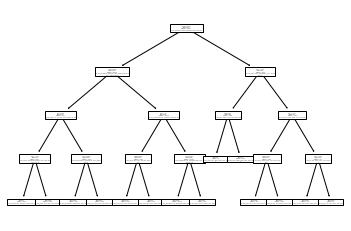

In [12]:
from sklearn import tree

tree.plot_tree(tr)